In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

#Importing data
data = pd.read_excel('AirQualityUCI.xlsx')

#Checking out data
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [2]:
#Cleaning up header names so they are more readable
new_col_names = ['Date', 'Time', 'CO (mg/m^3), True HA', 'Tin oxide, HA', 'NMHC, True HA', 'Benzene (micromg/m^3), True HA', 'Titania, HA', 'NOx (ppb), True HA', 'Tungsten oxide, HA, nom NOx targeted','NO2 (micromg/m^3), True HA' ,'Tungsten oxide, HA, nom NO2 targeted','Indium oxide, HA', 'Temp, Celsius', 'Relative Humidity, %', 'Absolute Humidity']
data.columns = new_col_names

#Checking data for new col names
data.head()

,Date,Time,"CO (mg/m^3), True HA","Tin oxide, HA","NMHC, True HA","Benzene (micromg/m^3), True HA","Titania, HA","NOx (ppb), True HA","Tungsten oxide, HA, nom NOx targeted","NO2 (micromg/m^3), True HA","Tungsten oxide, HA, nom NO2 targeted","Indium oxide, HA","Temp, Celsius","Relative Humidity, %",Absolute Humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
#In the dataset notes, missing data has been replaced with -200
#Let's remove those data points
for col in new_col_names:
    data = data[data[col] != -200]

In [4]:
#Sectioning out data of interest
interest_cols = ['Tin oxide, HA', 'NOx (ppb), True HA','CO (mg/m^3), True HA', 'NO2 (micromg/m^3), True HA', 'Temp, Celsius', 'Relative Humidity, %', 'Absolute Humidity']
interest_data = data[interest_cols]

#Checking new dataframe
interest_data.head()

,"Tin oxide, HA","NOx (ppb), True HA","CO (mg/m^3), True HA","NO2 (micromg/m^3), True HA","Temp, Celsius","Relative Humidity, %",Absolute Humidity
0,1360.00,166.0,2.6,113.0,13.60,48.875001,0.757754
1,1292.25,103.0,2.0,92.0,13.30,47.700000,0.725487
2,1402.00,131.0,2.2,114.0,11.90,53.975000,0.750239
3,1375.50,172.0,2.2,122.0,11.00,60.000000,0.786713
4,1272.25,131.0,1.6,116.0,11.15,59.575001,0.788794


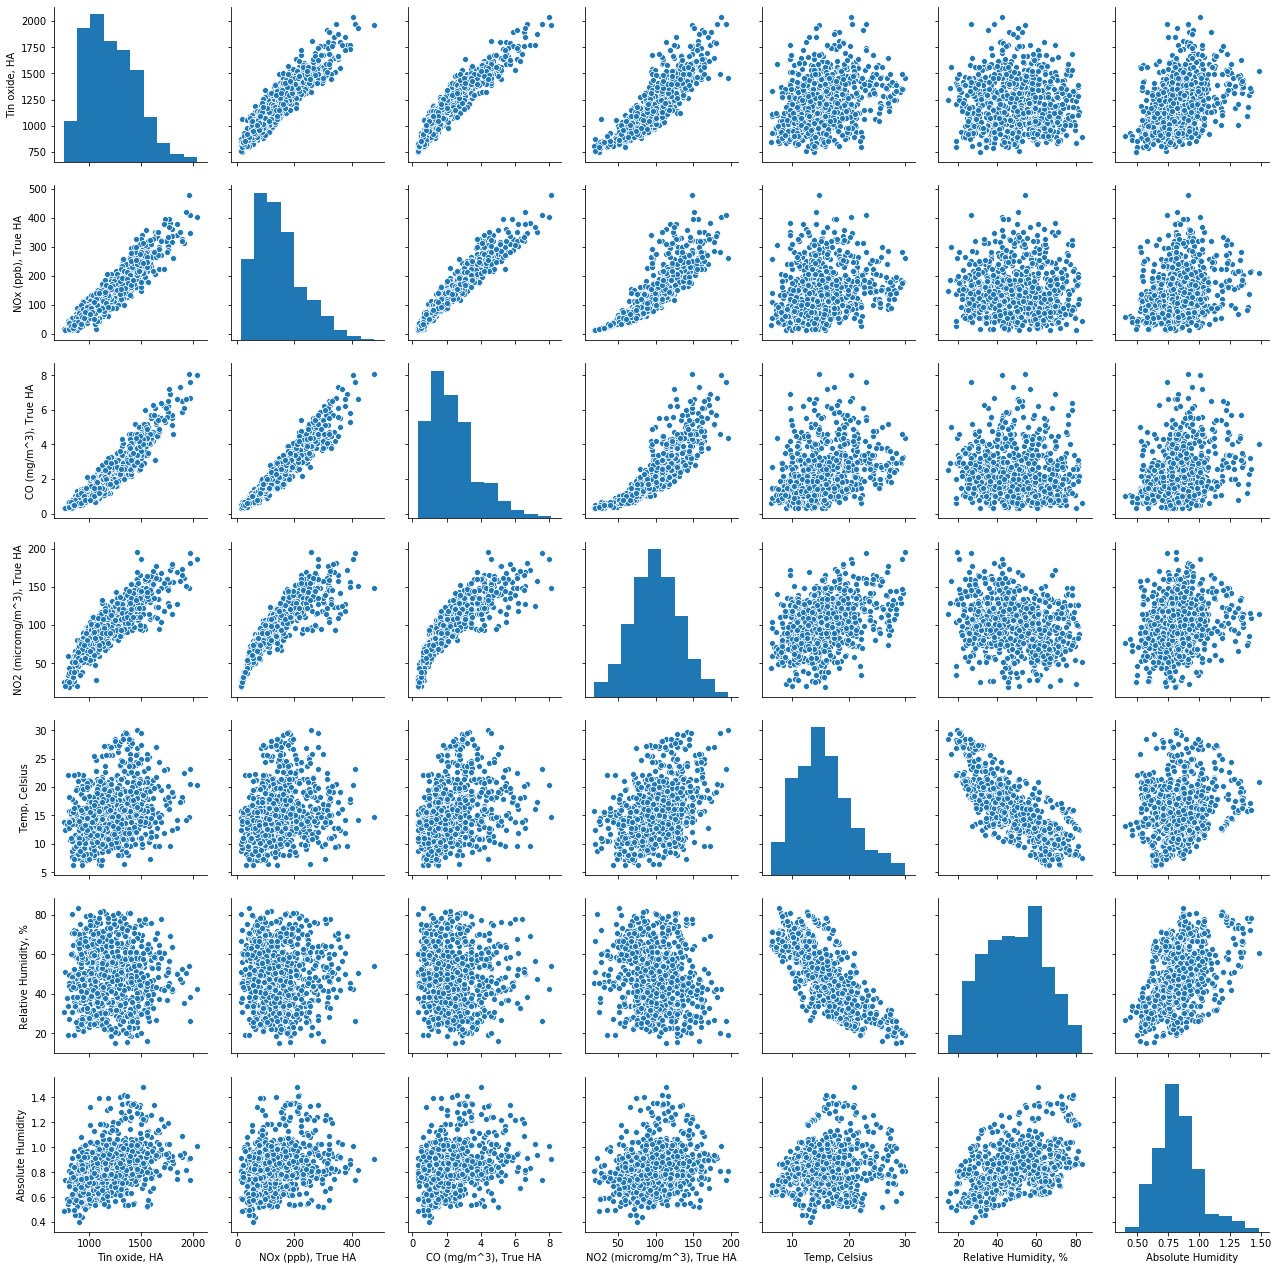

In [5]:
#Visualizing data trends
import seaborn as sns
sns.pairplot(interest_data)

In [6]:
#Use Spearman's Correlation
from scipy.stats import spearmanr

#List column names in reverse
reversed_names = list(reversed(interest_cols))

#Let's run through and see which variables are the most related using Spearman's Correlation
related_rho = []
related_pval = []
rho_vals = []
p_vals = []

#Finding related features
for col in interest_cols:
    for col2 in reversed_names:
        rho, pval = spearmanr(interest_data[col], interest_data[col2])
        if rho > .8:
            rho_vals.append(rho)
            related_rho.append([col, col2])
        if pval < 0.05:
            p_vals.append(pval)
            related_pval.append([col, col2])
            
#Taking a look
print(len(rho_vals), len(p_vals))

19 47


In [8]:
#Normalizing the data from [-1,1]
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(interest_data)
df_normalized = pd.DataFrame(np_scaled, columns = interest_cols)
df_normalized.head()

,"Tin oxide, HA","NOx (ppb), True HA","CO (mg/m^3), True HA","NO2 (micromg/m^3), True HA","Temp, Celsius","Relative Humidity, %",Absolute Humidity
0,-0.056127,-0.339056,-0.410256,0.062147,-0.382508,-0.005488,-0.343559
1,-0.161391,-0.609442,-0.564103,-0.175141,-0.407798,-0.039883,-0.403150
2,0.009128,-0.489270,-0.512821,0.073446,-0.525817,0.143798,-0.357438
3,-0.032045,-0.313305,-0.512821,0.163842,-0.601686,0.320161,-0.290076
4,-0.192465,-0.489270,-0.666667,0.096045,-0.589041,0.307721,-0.286232


In [9]:
#Defining data and label DataFrames
x = df_normalized[['Tin oxide, HA', 'NOx (ppb), True HA','CO (mg/m^3), True HA', 'NO2 (micromg/m^3), True HA', 'Temp, Celsius', 'Relative Humidity, %', 'Absolute Humidity']]
y = df_normalized[['Tin oxide, HA', 'NOx (ppb), True HA','CO (mg/m^3), True HA', 'NO2 (micromg/m^3), True HA']]

#Dropping rows so labels are future data
len_x = len(x)
x = x.drop(x.index[len_x-1])
y = y.drop(y.index[0])

In [10]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

#Splitting data into training and testing sets
train_data, test_data, train_label, test_label = train_test_split(x,y)

In [11]:
#Importing tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Building the neural network
model = Sequential()
model.add(Dense(7, input_dim=7, activation='sigmoid'))
model.add(Dense(49, activation='tanh'))
model.add(Dense(4, activation='linear'))

In [12]:
#Compiling model
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mse'])

#Storing loss data and fitting model
history = model.fit(train_data, train_label, epochs=2000)

Epoch 1/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.2476 - mse: 0.2476
Epoch 2/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.1411 - mse: 0.1411
Epoch 3/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.1309 - mse: 0.1309
Epoch 4/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.1237 - mse: 0.1237
Epoch 5/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 6/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.1082 - mse: 0.1082
Epoch 7/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0991 - mse: 0.0991
Epoch 8/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0889 - mse: 0.0889
Epoch 9/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0796 - mse: 0.0796
Epoch 10/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0707 - mse: 0.0707
Epoch 11/2000
20/20 [============================

20/20 [==============================] - 0s 2ms/step - loss: 0.0457 - mse: 0.0457
Epoch 87/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0445 - mse: 0.0445
Epoch 88/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0440 - mse: 0.0440
Epoch 89/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0441 - mse: 0.0441
Epoch 90/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0438 - mse: 0.0438
Epoch 91/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0438 - mse: 0.0438
Epoch 92/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0439 - mse: 0.0439
Epoch 93/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0442 - mse: 0.0442
Epoch 94/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0436 - mse: 0.0436
Epoch 95/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0437 - mse: 0.0437
Epoch 96/2000
20/20 [==============================] -

20/20 [==============================] - 0s 1ms/step - loss: 0.0396 - mse: 0.0396
Epoch 171/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0397 - mse: 0.0397
Epoch 172/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0396 - mse: 0.0396
Epoch 173/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0395 - mse: 0.0395
Epoch 174/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0399 - mse: 0.0399
Epoch 175/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0406 - mse: 0.0406
Epoch 176/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0395 - mse: 0.0395
Epoch 177/2000
20/20 [==============================] - ETA: 0s - loss: 0.0635 - mse: 0.063 - 0s 2ms/step - loss: 0.0396 - mse: 0.0396
Epoch 178/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0399 - mse: 0.0399
Epoch 179/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0396 - mse: 0.0396
Epoch 1

20/20 [==============================] - 0s 2ms/step - loss: 0.0395 - mse: 0.0395
Epoch 255/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0388 - mse: 0.0388
Epoch 256/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0388 - mse: 0.0388
Epoch 257/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0391 - mse: 0.0391
Epoch 258/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0396 - mse: 0.0396
Epoch 259/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0390 - mse: 0.0390
Epoch 260/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0386 - mse: 0.0386
Epoch 261/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0391 - mse: 0.0391
Epoch 262/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0387 - mse: 0.0387
Epoch 263/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0392 - mse: 0.0392
Epoch 264/2000
20/20 [=======================

20/20 [==============================] - 0s 2ms/step - loss: 0.0387 - mse: 0.0387
Epoch 339/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386
Epoch 340/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386
Epoch 341/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386
Epoch 342/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0385 - mse: 0.0385
Epoch 343/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0384 - mse: 0.0384
Epoch 344/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0385 - mse: 0.0385
Epoch 345/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386
Epoch 346/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0387 - mse: 0.0387
Epoch 347/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0388 - mse: 0.0388
Epoch 348/2000
20/20 [=======================

20/20 [==============================] - 0s 2ms/step - loss: 0.0393 - mse: 0.0393
Epoch 423/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0388 - mse: 0.0388
Epoch 424/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0383 - mse: 0.0383
Epoch 425/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0400 - mse: 0.0400
Epoch 426/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0382 - mse: 0.0382
Epoch 427/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0383 - mse: 0.0383
Epoch 428/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0382 - mse: 0.0382
Epoch 429/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0383 - mse: 0.0383
Epoch 430/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0379 - mse: 0.0379
Epoch 431/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0394 - mse: 0.0394
Epoch 432/2000
20/20 [=======================

20/20 [==============================] - 0s 2ms/step - loss: 0.0382 - mse: 0.0382
Epoch 507/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0384 - mse: 0.0384
Epoch 508/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0380 - mse: 0.0380
Epoch 509/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0388 - mse: 0.0388
Epoch 510/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0390 - mse: 0.0390
Epoch 511/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0379 - mse: 0.0379
Epoch 512/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0383 - mse: 0.0383
Epoch 513/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0385 - mse: 0.0385
Epoch 514/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0381 - mse: 0.0381
Epoch 515/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0382 - mse: 0.0382
Epoch 516/2000
20/20 [=======================

20/20 [==============================] - 0s 2ms/step - loss: 0.0384 - mse: 0.0384
Epoch 591/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376
Epoch 592/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0378 - mse: 0.0378
Epoch 593/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0382 - mse: 0.0382
Epoch 594/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0379 - mse: 0.0379
Epoch 595/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0380 - mse: 0.0380
Epoch 596/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0380 - mse: 0.0380
Epoch 597/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386
Epoch 598/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0393 - mse: 0.0393
Epoch 599/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0389 - mse: 0.0389
Epoch 600/2000
20/20 [=======================

20/20 [==============================] - 0s 2ms/step - loss: 0.0375 - mse: 0.0375
Epoch 675/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0379 - mse: 0.0379
Epoch 676/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0380 - mse: 0.0380
Epoch 677/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0380 - mse: 0.0380
Epoch 678/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0378 - mse: 0.0378
Epoch 679/2000
20/20 [==============================] - 0s 3ms/step - loss: 0.0379 - mse: 0.0379
Epoch 680/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376
Epoch 681/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0382 - mse: 0.0382
Epoch 682/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0378 - mse: 0.0378
Epoch 683/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.0381 - mse: 0.0381
Epoch 684/2000
20/20 [=======================

20/20 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376
Epoch 759/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0377 - mse: 0.0377
Epoch 760/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0379 - mse: 0.0379
Epoch 761/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0389 - mse: 0.0389
Epoch 762/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0384 - mse: 0.0384
Epoch 763/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0377 - mse: 0.0377
Epoch 764/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0374 - mse: 0.0374
Epoch 765/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0377 - mse: 0.0377
Epoch 766/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0379 - mse: 0.0379
Epoch 767/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0372 - mse: 0.0372
Epoch 768/2000
20/20 [=======================

20/20 [==============================] - 0s 2ms/step - loss: 0.0371 - mse: 0.0371
Epoch 843/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0374 - mse: 0.0374
Epoch 844/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370
Epoch 845/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370
Epoch 846/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0375 - mse: 0.0375
Epoch 847/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0374 - mse: 0.0374
Epoch 848/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0375 - mse: 0.0375
Epoch 849/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0371 - mse: 0.0371
Epoch 850/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373
Epoch 851/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0375 - mse: 0.0375
Epoch 852/2000
20/20 [=======================

20/20 [==============================] - 0s 2ms/step - loss: 0.0374 - mse: 0.0374
Epoch 927/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0383 - mse: 0.0383
Epoch 928/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0369 - mse: 0.0369
Epoch 929/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376
Epoch 930/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373
Epoch 931/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370
Epoch 932/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370
Epoch 933/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370
Epoch 934/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0371 - mse: 0.0371
Epoch 935/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0371 - mse: 0.0371
Epoch 936/2000
20/20 [=======================

20/20 [==============================] - 0s 2ms/step - loss: 0.0366 - mse: 0.0366
Epoch 1011/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0371 - mse: 0.0371
Epoch 1012/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0368 - mse: 0.0368
Epoch 1013/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367
Epoch 1014/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0366 - mse: 0.0366
Epoch 1015/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367
Epoch 1016/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0369 - mse: 0.0369
Epoch 1017/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0371 - mse: 0.0371
Epoch 1018/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0365 - mse: 0.0365
Epoch 1019/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367
Epoch 1020/2000
20/20 [=============

20/20 [==============================] - 0s 2ms/step - loss: 0.0381 - mse: 0.0381
Epoch 1094/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370
Epoch 1095/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364
Epoch 1096/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0366 - mse: 0.0366
Epoch 1097/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367
Epoch 1098/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0378 - mse: 0.0378
Epoch 1099/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0377 - mse: 0.0377
Epoch 1100/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367
Epoch 1101/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373
Epoch 1102/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0382 - mse: 0.0382
Epoch 1103/2000
20/20 [=============

20/20 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362
Epoch 1177/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364
Epoch 1178/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364
Epoch 1179/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362
Epoch 1180/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362
Epoch 1181/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364
Epoch 1182/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362
Epoch 1183/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0363 - mse: 0.0363
Epoch 1184/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364
Epoch 1185/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362
Epoch 1186/2000
20/20 [=============

20/20 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370
Epoch 1260/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364
Epoch 1261/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0366 - mse: 0.0366
Epoch 1262/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364
Epoch 1263/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0361 - mse: 0.0361
Epoch 1264/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0363 - mse: 0.0363
Epoch 1265/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373
Epoch 1266/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0365 - mse: 0.0365
Epoch 1267/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362
Epoch 1268/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0360 - mse: 0.0360
Epoch 1269/2000
20/20 [=============

20/20 [==============================] - 0s 1ms/step - loss: 0.0362 - mse: 0.0362
Epoch 1343/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0358 - mse: 0.0358
Epoch 1344/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364
Epoch 1345/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0361 - mse: 0.0361
Epoch 1346/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0363 - mse: 0.0363
Epoch 1347/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0357 - mse: 0.0357
Epoch 1348/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359
Epoch 1349/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0360 - mse: 0.0360
Epoch 1350/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0361 - mse: 0.0361
Epoch 1351/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0366 - mse: 0.0366
Epoch 1352/2000
20/20 [=============

20/20 [==============================] - 0s 1ms/step - loss: 0.0362 - mse: 0.0362
Epoch 1426/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0367 - mse: 0.0367
Epoch 1427/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0363 - mse: 0.0363
Epoch 1428/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362
Epoch 1429/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362
Epoch 1430/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359
Epoch 1431/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0370 - mse: 0.0370
Epoch 1432/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0359 - mse: 0.0359
Epoch 1433/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0354 - mse: 0.0354
Epoch 1434/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0373 - mse: 0.0373
Epoch 1435/2000
20/20 [=============

20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359
Epoch 1509/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0356 - mse: 0.0356
Epoch 1510/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0357 - mse: 0.0357
Epoch 1511/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0355 - mse: 0.0355
Epoch 1512/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0359 - mse: 0.0359
Epoch 1513/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0357 - mse: 0.0357
Epoch 1514/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0357 - mse: 0.0357
Epoch 1515/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0356 - mse: 0.0356
Epoch 1516/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359
Epoch 1517/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0364 - mse: 0.0364
Epoch 1518/2000
20/20 [=============

20/20 [==============================] - 0s 2ms/step - loss: 0.0358 - mse: 0.0358
Epoch 1592/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0356 - mse: 0.0356
Epoch 1593/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0353 - mse: 0.0353
Epoch 1594/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0352 - mse: 0.0352
Epoch 1595/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0358 - mse: 0.0358
Epoch 1596/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0356 - mse: 0.0356
Epoch 1597/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0356 - mse: 0.0356
Epoch 1598/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0355 - mse: 0.0355
Epoch 1599/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0353 - mse: 0.0353
Epoch 1600/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0358 - mse: 0.0358
Epoch 1601/2000
20/20 [=============

20/20 [==============================] - 0s 1ms/step - loss: 0.0356 - mse: 0.0356
Epoch 1675/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0356 - mse: 0.0356
Epoch 1676/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0358 - mse: 0.0358
Epoch 1677/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0353 - mse: 0.0353
Epoch 1678/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0353 - mse: 0.0353
Epoch 1679/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0354 - mse: 0.0354
Epoch 1680/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0357 - mse: 0.0357
Epoch 1681/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0350 - mse: 0.0350
Epoch 1682/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0352 - mse: 0.0352
Epoch 1683/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0356 - mse: 0.0356
Epoch 1684/2000
20/20 [=============

20/20 [==============================] - 0s 1ms/step - loss: 0.0352 - mse: 0.0352
Epoch 1758/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0352 - mse: 0.0352
Epoch 1759/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0354 - mse: 0.0354
Epoch 1760/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0351 - mse: 0.0351
Epoch 1761/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0350 - mse: 0.0350
Epoch 1762/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0353 - mse: 0.0353
Epoch 1763/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0351 - mse: 0.0351
Epoch 1764/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0352 - mse: 0.0352
Epoch 1765/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0350 - mse: 0.0350
Epoch 1766/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0350 - mse: 0.0350
Epoch 1767/2000
20/20 [=============

20/20 [==============================] - 0s 1ms/step - loss: 0.0349 - mse: 0.0349
Epoch 1841/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0349 - mse: 0.0349
Epoch 1842/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0347 - mse: 0.0347
Epoch 1843/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348
Epoch 1844/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0350 - mse: 0.0350
Epoch 1845/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0347 - mse: 0.0347
Epoch 1846/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0346 - mse: 0.0346
Epoch 1847/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0349 - mse: 0.0349
Epoch 1848/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0353 - mse: 0.0353
Epoch 1849/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0351 - mse: 0.0351
Epoch 1850/2000
20/20 [=============

20/20 [==============================] - 0s 2ms/step - loss: 0.0348 - mse: 0.0348
Epoch 1924/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0349 - mse: 0.0349
Epoch 1925/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0354 - mse: 0.0354
Epoch 1926/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0345 - mse: 0.0345
Epoch 1927/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0347 - mse: 0.0347
Epoch 1928/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0349 - mse: 0.0349
Epoch 1929/2000
20/20 [==============================] - 0s 2ms/step - loss: 0.0353 - mse: 0.0353
Epoch 1930/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0348 - mse: 0.0348
Epoch 1931/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0345 - mse: 0.0345
Epoch 1932/2000
20/20 [==============================] - 0s 1ms/step - loss: 0.0347 - mse: 0.0347
Epoch 1933/2000
20/20 [=============

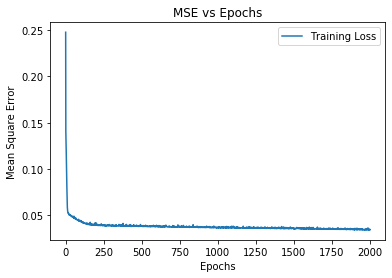

In [13]:
#Plotting MSE vs epochs
loss_vals = history.history['loss']
epochs = range(1, len(loss_vals)+1)

plt.plot(epochs, loss_vals, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.legend()
plt.title('MSE vs Epochs')
plt.show()

In [15]:
#Making predictions with the model
predictions = model.predict(test_data)

/Users/kayladuarte/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  if __name__ == '__main__':
/Users/kayladuarte/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  # Remove the CWD from sys.path while we load stuff.


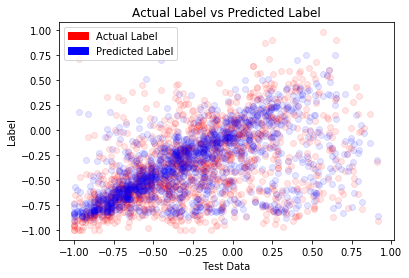

In [17]:
#Plotting predictions with actual labels
import matplotlib.patches as mpatches

#Creating legend patches
actual = mpatches.Patch(color='red', label='Actual Label')
predicted_label = mpatches.Patch(color='blue', label='Predicted Label')

#Plotting
plt.plot(test_data, test_label, 'o', color='red', alpha=.1)
plt.plot(test_data, predictions, 'o', color='blue', alpha=.1)
plt.title('Actual Label vs Predicted Label')
plt.xlabel('Test Data')
plt.ylabel('Label')
plt.legend(handles=[actual, predicted_label])

In [18]:
#calculating R^2
#importing library for R^2 value
from sklearn.metrics import r2_score

r2 = r2_score(test_label, predictions)
r2

0.6385992400478793